### t-SNE
t-SNE, or t-Distributed Stochastic Neighbor Embedding, is a machine learning algorithm developed by Laurens van der Maaten and Geoffrey Hinton in 2008. It is primarily used for the visualization of high-dimensional data. The algorithm is particularly well-suited for embedding high-dimensional data into a space of two or three dimensions, which can then be visualized in a scatter plot. t-SNE is highly effective at creating a map of clusters or groups within the data, making it a valuable tool for exploratory data analysis, especially in bioinformatics, finance, and other fields where high-dimensional data is common.

**Steps in t-SNE**

t-SNE involves several steps and internal mechanisms that focus on preserving the local structure of the data while embedding it into a lower-dimensional space. Here’s a step-by-step breakdown of the process:

**Similarity Computation in High-Dimensional Space**

t-SNE starts by converting the Euclidean distances between points in the original high-dimensional space into conditional probabilities that represent similarities. The similarity of datapoint 𝑥𝑗 to datapoint x𝑖 is the conditional probability 𝑝𝑗∣𝑖 , which is proportional to the probability that 𝑥𝑖  would pick 𝑥𝑗 as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at 𝑥𝑖.

Mathematically, this is expressed as:
$$
p_{j|i} = \frac{\exp\left(-\frac{||x_i - x_j||^2}{2\sigma_i^2}\right)}{\sum_{k \neq i} \exp\left(-\frac{||x_i - x_k||^2}{2\sigma_i^2}\right)}
$$

σi (the variance of the Gaussian used to compute the probability) is chosen per point, in a way that the perplexity (a measure of effective number of local neighbors) of the conditional distribution equals a predefined perplexity.

**Symmetrization:**

To simplify the computation and make it less dependent on the direction (i.e.,𝑖 to 𝑗 or 𝑗 to 𝑖), the conditional probabilities are converted into joint probabilities:
$$
p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}
$$
Here,𝑁 is the number of data points.

**Low-Dimensional Embedding and Similarity Computation:**

t-SNE then maps the high-dimensional data to a lower-dimensional space (typically 2D or 3D) and computes similar pairwise probabilities in this space, but using a Student’s t-distribution with one degree of freedom (which has heavier tails compared to the Gaussian distribution used in the high-dimensional space):
$$
q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l} (1 + ||y_k - y_l||^2)^{-1}}
$$
yi and 𝑦𝑗  are the low-dimensional representations of 𝑥𝑖 and 𝑥𝑗 respectively.

**Optimization:**

The positions of points in the low-dimensional space are optimized to reduce the difference between the high-dimensional probabilities 𝑝𝑖𝑗 and the low-dimensional probabilities 𝑞𝑖𝑗. This is typically done using a cost function known as the Kullback-Leibler divergence, which is minimized using gradient descent:
$$
C = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
$$

The gradient of the Kullback-Leibler divergence with respect to each point in the low-dimensional space is computed and used to update the positions of the points iteratively.

**Early Exaggeration:**
To help the algorithm navigate better local minima and separate clusters more distinctly, an early exaggeration phase is used. This involves temporarily increasing the 𝑝𝑖𝑗 values, making the clusters in the low-dimensional map spread out more than they normally would.

**Tuning and Iteration:**

The algorithm involves several hyperparameters such as the initial learning rate, the perplexity, and the number of iterations. These need to be tuned based on the specific dataset and the desired outcome.

t-SNE is computationally intensive, especially on large datasets, but its ability to reveal the underlying structure of complex data makes it a powerful tool for visual data exploration.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE 

In [2]:
# load data
#filename = 'https://raw.githubusercontent.com/slmsshk/DataSet/main/TSNE_data.csv'
dataframe = pd.read_csv("breast_cancer.csv")

In [3]:
dataframe

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [4]:
# Split-out validation dataset
array1 = dataframe.values
# separate array into input and output components
X = array1[:,1:]
Y = array1[:,0]

In [5]:
X

array([[17.99, 10.38, 122.8, ..., 0.2654, 0.4601, 0.1189],
       [20.57, 17.77, 132.9, ..., 0.186, 0.275, 0.08902],
       [19.69, 21.25, 130.0, ..., 0.243, 0.3613, 0.08758],
       ...,
       [16.6, 28.08, 108.3, ..., 0.1418, 0.2218, 0.0782],
       [20.6, 29.33, 140.1, ..., 0.265, 0.4087, 0.124],
       [7.76, 24.54, 47.92, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [6]:
data_tsne = TSNE(n_components=2, perplexity = 30).fit_transform(X)

In [7]:
data_tsne

array([[ 41.17669  , -13.62297  ],
       [ 41.535305 , -10.952655 ],
       [ 36.9928   , -10.68851  ],
       ...,
       [ 21.95645  ,  -2.7500494],
       [ 39.425835 , -10.884466 ],
       [-37.83837  , -25.31228  ]], dtype=float32)

In [9]:
tsne_df = pd.DataFrame(data_tsne, columns=["x1","x2"])
tsne_df

,x1,x2
0,41.176689,-13.622970
1,41.535305,-10.952655
2,36.992802,-10.688510
3,-17.334986,1.803354
4,35.960552,-8.538705
...,...,...
564,43.086044,-10.444331
565,37.946251,-10.130602
566,21.956450,-2.750049
567,39.425835,-10.884466


In [10]:
tsne_df["diagnosis"]=dataframe.diagnosis
tsne_df

,x1,x2,diagnosis
0,41.176689,-13.622970,M
1,41.535305,-10.952655,M
2,36.992802,-10.688510,M
3,-17.334986,1.803354,M
4,35.960552,-8.538705,M
...,...,...,...
564,43.086044,-10.444331,M
565,37.946251,-10.130602,M
566,21.956450,-2.750049,M
567,39.425835,-10.884466,M


<Axes: xlabel='x1', ylabel='x2'>

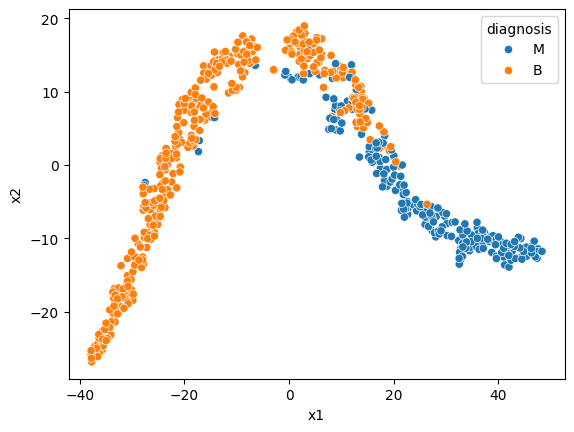

In [11]:
sns.scatterplot(data=tsne_df,x='x1',y='x2',hue='diagnosis',legend="full",alpha=1.0)

In [12]:
data_tsne1 = TSNE(n_components=3).fit_transform(X)

In [13]:
data_tsne1

array([[ 17.497932  ,  -8.576639  ,   3.781346  ],
       [ 17.769482  ,  -7.0519667 ,   4.950761  ],
       [ 15.859131  ,  -5.8485    ,   3.2188327 ],
       ...,
       [ 11.117847  ,   0.27382323,  -2.8840683 ],
       [ 16.868174  ,  -6.399698  ,   4.2362323 ],
       [-21.640192  ,   0.52524483,   0.84735477]], dtype=float32)

In [14]:
tsne_df1 = pd.DataFrame(data_tsne1, columns=["x1","x2","x3"])
tsne_df1["diagnosis"]=dataframe.diagnosis
tsne_df1

,x1,x2,x3,diagnosis
0,17.497932,-8.576639,3.781346,M
1,17.769482,-7.051967,4.950761,M
2,15.859131,-5.848500,3.218833,M
3,-5.186554,-4.149322,3.308815,M
4,15.546749,-4.238571,3.229974,M
...,...,...,...,...
564,18.612980,-7.086233,5.586810,M
565,16.279318,-5.653308,3.801446,M
566,11.117847,0.273823,-2.884068,M
567,16.868174,-6.399698,4.236232,M


/tmp/ipykernel_70958/1096713090.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(x, y, z, s=20, c=col, marker='o', cmap=cmap, alpha=1.0)
/home/rgukt/.local/lib/python3.10/site-packages/matplotlib/collections.py:1109: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


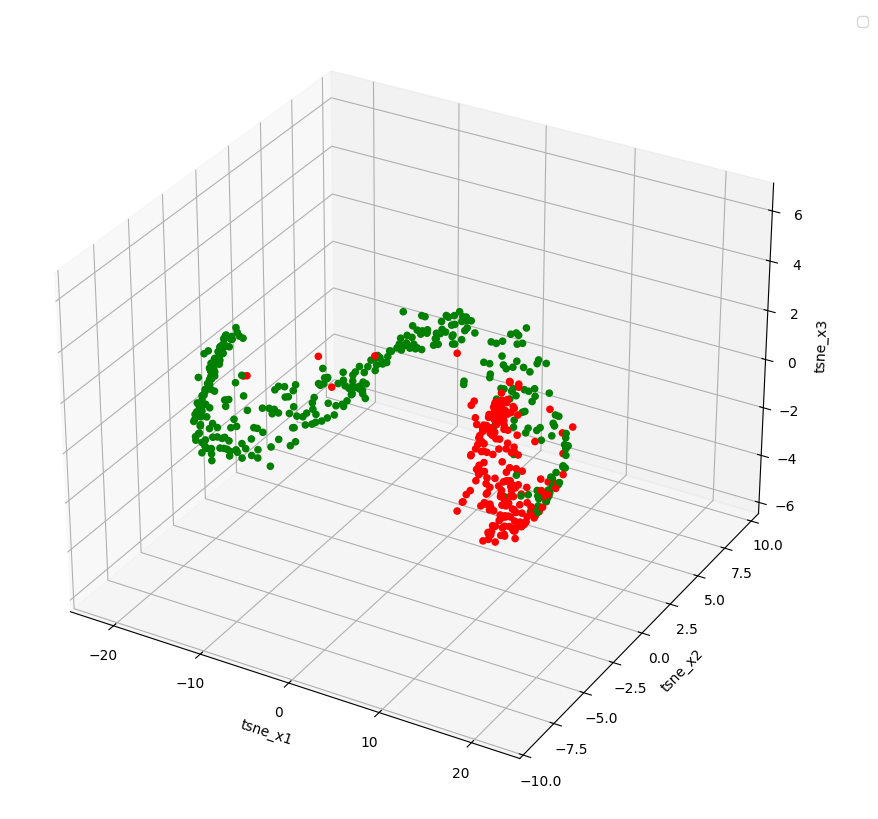

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# axes instance
fig = plt.figure(figsize=(8,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

x = tsne_df1['x1']
y = tsne_df1['x2']
z = tsne_df1['x3']

ax.set_xlabel("tsne_x1")
ax.set_ylabel("tsne_x2")
ax.set_zlabel("tsne_x3")
# plot
col=tsne_df1['diagnosis'].map({'M':'r','B':'g'})
sc = ax.scatter(x, y, z, s=20, c=col, marker='o', cmap=cmap, alpha=1.0)
# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()
# save
# plt.savefig("scatter_hue", bbox_inches='tight')

### Tuning the parameters
t-SNE offers several tunable parameters that significantly influence its performance and the quality of the visualizations it produces. Tuning these parameters appropriately is crucial for achieving meaningful and interpretable results. Here are the key tunable parameters in t-SNE:

1. **Perplexity**: 
   - The perplexity parameter is a guess about the number of close neighbors each point has. Technically, it relates to the number of nearest neighbors that is used in other manifold learning algorithms. 
   - Typical values for perplexity range between 5 and 50. Choosing the right perplexity value usually requires some experimentation and depends largely on the size of the dataset. A larger dataset usually requires a higher perplexity. The choice of perplexity can significantly affect the results.

2. **Learning Rate**:
   - The learning rate in t-SNE is a crucial parameter that determines how much the weights are adjusted at each update during the optimization of the Kullback-Leibler divergence.
   - If the learning rate is too high, the map may look like a "ball" with various points scattered randomly around the edges. If it’s too low, the map may be too dense with many points not fully unfolding in the low-dimensional space.
   - Typical values range from 10 to 1000, and like perplexity, it may require tuning specific to the dataset at hand.

3. **Number of Iterations**:
   - This is the number of iterations the algorithm runs to optimize the positions of the points in the lower-dimensional space.
   - Generally, more iterations will allow the algorithm more opportunity to find a good configuration but will take longer to compute. Insufficient iterations might result in an under-optimized layout, affecting the quality of the visualization.

4. **Early Exaggeration**:
   - This parameter controls the tightness with which natural clusters in the original space are shown in the embedded space and helps the points move out of local minima during the optimization.
   - Higher values can help the visualization spread out more and can be particularly useful for smaller datasets or datasets with clear clustering. The default value is typically around 12, but this can be adjusted based on specific needs.

5. **Metric**:
   - t-SNE can use various metrics to calculate the distances between points in high-dimensional space (Euclidean, Manhattan, cosine, etc.).
   - The choice of metric can affect the performance of t-SNE, especially depending on the nature of the data. For example, cosine similarity is often more appropriate for text data represented in vector space.

6. **Initialization**:
   - How the points are placed initially in the lower-dimensional space. Typically, points can be initialized randomly or using PCA (Principal Component Analysis) for a potentially better starting point that could lead to better results.
   - PCA initialization is generally more stable and can speed up the computation by positioning points in a way that reflects their actual distances in the high-dimensional space.

Adjusting these parameters requires understanding both the algorithm and the data at hand. Often, the best settings are found through a combination of domain knowledge, understanding of the algorithm’s dynamics, and empirical experimentation.

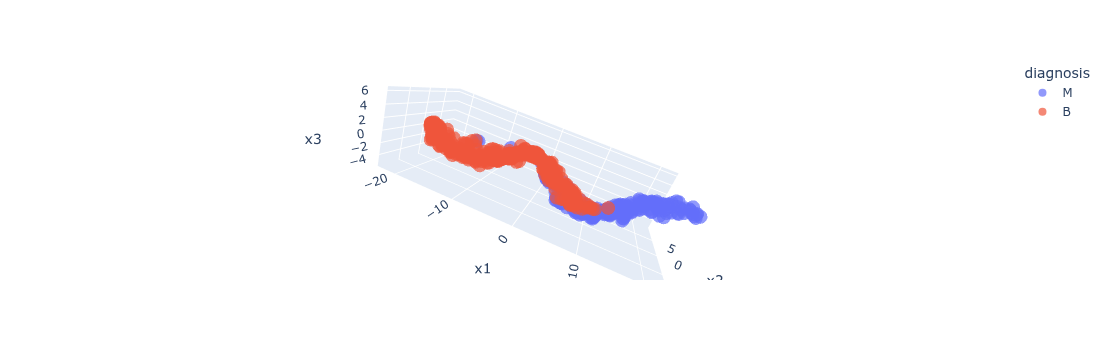

In [18]:
import plotly.express as px
fig = px.scatter_3d(tsne_df1,x='x1',y='x2',z='x3',color='diagnosis',size_max = 10,opacity = 0.7)
fig.show()

In [16]:
import seaborn as sns
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]